Own Code

In [1]:
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import caffeine
import warnings
import csv
warnings.filterwarnings(action='once')

In [3]:
# program_df = pd.read_csv("/Users/krishna/Dropbox/Data/Data/Program/correct File/csvwithHeaders/part-00000-024e4c6e-680c-49e1-8e20-667765b52332-c000.csv")
imdb_extract = pq.read_table("/Users/krishna/Dropbox/Data/final_datasets/feature_enginnering/program_features/data_cleaned/csv/GenreImputed/Imdb_scraped/parquet/part-00000-49011331-6ccb-4ff9-8a32-ce377025688f-c000.snappy.parquet")
imdb_extract_df = imdb_extract.to_pandas()
imdb_extract_df.replace("NULL", np.nan,inplace=True)
imdb_extract_df.replace(np.nan, 0,inplace=True)
imdb_extract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 26 columns):
MASTER_TITLE          265 non-null object
EVENT_DATE            265 non-null object
CATEGORY_ID           265 non-null object
SUBCATEGORY_ID        265 non-null object
RUNTIME               265 non-null object
EPISODE_COUNT         265 non-null object
day                   265 non-null object
week_text             265 non-null object
week_encoded          265 non-null object
month                 265 non-null object
vwp_days              265 non-null object
weekend               265 non-null object
daypart               265 non-null object
weekOfTheYear         265 non-null object
EVENT_END_DATE        265 non-null object
airStartDate          265 non-null object
airStartTime          265 non-null object
airEndDate            265 non-null object
airEndTime            265 non-null object
AirYear               265 non-null object
imdb_program_id       265 non-null object
imdb_genres  

In [4]:
list(imdb_extract_df.MASTER_TITLE).index('Flash')

262

In [5]:
replace_data = {'Jessie' : 'Jessie (2011 TV series)',
               'Wheel of Fortune' : 'Wheel of Fortune (American game show)',
               'Sunny Day' : 'Sunny Day (TV series)',
                "Crikey! It's the Irwins" : "Crikey! It's the Irwins",
                'Buzz':"Buzz (TV series)",
                "The Doctors":"The Doctors (2016 TV series)",
                "HUD" : "HUD (TV program)",
                "Flash" : "The Flash (2014 TV series)"
               }

In [6]:
replace_data["Flash"]

'The Flash (2014 TV series)'

In [7]:
for i in imdb_extract_df.MASTER_TITLE:
    for k in replace_data.keys(): 
        if k==i:
            imdb_extract_df.MASTER_TITLE.replace({i : replace_data[str(k)]},inplace=True)

In [8]:
list(imdb_extract_df.MASTER_TITLE).index("The Flash (2014 TV series)")

262

In [9]:
# imdb_extract_df.MASTER_TITLE

In [28]:
import pandas as pd
import numpy as np
import wikipedia
import time

class DataDictionary():
    
    def __init__(self,interestList,no_of_articles,filename):
        self.interestList = interestList
        self.filename = filename
        self.data_dictionary = {}
        self.no_of_articles = no_of_articles
            
    def addtodictionary(self,interestList):
        import wikipedia as wk
        import random
        execute = 1
        while execute:
            if interestList not in self.data_dictionary:
                try :
                    pageofobservation = wk.page(interestList)
                    pagecontent = pageofobservation.content                    
                    self.data_dictionary[interestList] = pagecontent
                    pagelinks = pageofobservation.links
#                     print(interestList,' ',len(pagelinks))
                    execute = 0
                except wk.exceptions.PageError: 
                    f = open(self.filename, "a")
                    f.write('Page not found : {} \n'.format(interestList))
                    f.close()
                    pagelinks = []
                    execute = 0
#                     continue
                except wk.DisambiguationError as e:
                    options_new = [ elem for elem in e.options if not elem.lower().find('(disambiguation)') > 0]
                    if len(options_new) < 5 and len(options_new)>0:
                        s = str(random.choice(options_new))
                        self.addtodictionary(s)
                        pagelinks = []
                        execute = 0
                    else :
                        execute = 0
                        pagelinks = []
            else:
                execute = 0
                pagelinks = []
        return pagelinks
            
    
    def searchWiki(self):
        import wikipedia as wk
        import random
        searchList = wk.search(self.interestList)
        searchList_new = [ elem for elem in searchList if not elem.lower().find('(disambiguation)') > 0]
        if len(searchList_new)>0 and (searchList_new[0].lower() == self.interestList.lower() or searchList_new[0].lower() == str(self.interestList +' (TV series)').lower()) :
            p1 = self.addtodictionary(self.interestList)
            control_list_exact = ['Dolby Digital 5.1','HDTV','1080i','480i','16:9','5.1 Surround Sound ']
            control_list_soft = 'United States network television schedule'
            p1_n1 = [ elem for elem in p1 if elem not in control_list_exact]
            p1_n2 = [ elem for elem in p1_n1 if not elem.lower().find(control_list_soft.lower()) >0]
            p1_new = [ elem for elem in p1_n2 if not elem.lower().find('(disambiguation)') > 0]
            f = open(self.filename, "a")
            f.write('{} - Perfect match - {} links, picking random {} \n'.format(self.interestList, len(p1_new),self.no_of_articles))
            f.close()
            for i in range(len(p1_new[0:self.no_of_articles])):
                f = open(self.filename, "a")
                f.write('{} - Perfect match - {} \n'.format(self.interestList,p1_new[i]))
                f.close()
                p2 = self.addtodictionary(p1_new[i])
        else :
            f = open(self.filename, "a")
            f.write('{} - No Perfect match - picking top 5 matches only \n'.format(self.interestList))
            f.close()
            for i in range(len(searchList_new[0:5])):
                p1 = self.addtodictionary(searchList_new[i])
                p1_new = [ elem for elem in p1 if not elem.lower().find('(disambiguation)') > 0]
                f = open(self.filename, "a")
                f.write( '{} - No Perfect match - {} \n'.format(self.interestList,searchList_new[i]))
                f.close()

In [31]:
series_list = list(imdb_extract_df.MASTER_TITLE)
# ["Cazadores de tesoros"] ['TBBT','Camping Out','NCIS'],['Man with a Plan'] 
# ['TBBT',"America's Got Talent","Fixer Upper","Ellen's Game of Games","NCIS (TV series)","NCIS: Los Angeles"]

def spawn(series_list,articles_from_page,log_name):
    start = time.time()
    f=open(log_name, 'w')
    f.close()
    data_combined = pd.DataFrame()
    for i in range(len(series_list)):
        Obj_DD = DataDictionary(series_list[i],articles_from_page,log_name)
    #     f=open("Wiki_Read_Output.txt", 'a')
        Obj_DD.searchWiki()
    #     f.close()
        DD_list = []
        for j in range(len(Obj_DD.data_dictionary.values())):
            DD_list.append(list(Obj_DD.data_dictionary.values())[j])
        DD_Data = ", ".join(DD_list)   
        DD_PD = pd.DataFrame({'Data': DD_Data},index=[series_list[i]])
        data_combined = data_combined.append(DD_PD,ignore_index=False)
    end = time.time()
    print("Duration in min : ",(end-start)/60)
    return data_combined

data_combined = spawn(series_list, articles_from_page=10,log_name = "Wiki_Read_Output.txt")
# import multiprocessing
# for i in range(5):
#     p = multiprocessing.Process(target=spawn(series_list[0:5], articles_from_page=10,log_name = "Wiki_Read_Output.txt"))
#     p.start()
#     p.join()

/Users/krishna/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/krishna/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
/Users/krishna/anaconda3/lib/python3.6/site-packages/cryptography/x509/extensions.py:1191: ResourceWarning: unclosed <socket.socket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.0.100', 57330), raddr=('103.102.166.224', 443)>
  objs = (i.value for i in objs)


Duration in min :  76.81063545544943


In [26]:
pd.set_option('max_colwidth', 100)
data_combined.head()

,Data
Martha Bakes,"Martha Helen Stewart (née Kostyra; Polish pronunciation: [kɔ'stɨra]; born August 3, 1941) is an ..."
A Taste of History,"Taste, gustatory perception, or gustation (Adjectival form: gustatory) is one of the five tradit..."
Keeping Up With the Kardashians,Keeping Up with the Kardashians (often abbreviated KUWTK) is an American reality television seri...
Life in pieces,Life in Pieces is an American sitcom television series created by Justin Adler and which premier...
Summer Camp Island,It's been confirmed that Cosmic Bupkiss onwards is Season 2 by Cartoon Network and Julia Pott\nS...


In [27]:
import pickle
pickle_out = open("data_combined_265_10_articles.pickle","wb")
pickle.dump(data_combined, pickle_out)
pickle_out.close()

In [16]:
data_combined[data_combined.Data=='']

,Data
Unearthed,
Encuentros paranormales,
Aventuras con los Kratt,
Crikey! It's the Irwins,
Outlook,


In [21]:
import wikipedia as wk

In [22]:
x = wk.search("The Complex")
x

['Complex',
 'The Complex',
 'God complex',
 'Coordination complex',
 'QRS complex',
 'Oedipus complex',
 'Complex number',
 'Messiah complex',
 'Superiority complex',
 'Watergate complex']

In [23]:
wk.page('Wheel of Fortune (American game show)').links

['1080i',
 '2009 Game Show Awards',
 '480i',
 '720p',
 '77 Sunset Strip',
 'Alan Thicke',
 'Alex Trebek',
 'Allmusic',
 'American Broadcasting Company',
 'American Cancer Society',
 'Are You Smarter Than a 5th Grader? (American game show)',
 'Art Fleming',
 'Arte Johnson',
 'Atari, Inc. (Atari, SA subsidiary)',
 'Austin American-Statesman',
 'Barris Industries',
 'Bob Barker',
 'Bob Goen',
 'Boy Scouts of America',
 'Broadcast syndication',
 'Burbank, California',
 'CBS',
 'CBS Corporation',
 'CBS Television Distribution',
 'Cabazon, California',
 'Caesars Palace',
 'Califon, New Jersey',
 'Cash Cab (U.S. game show)',
 'Catchphrase',
 'Cessna 421',
 'Chapter 11 bankruptcy protection',
 "Charlie O'Donnell",
 'Chicago Sun-Times',
 'Chuck Woolery',
 'Claremont, California',
 'Columbia TriStar Television',
 'Columbus, Ohio',
 'Common cold',
 'Crossword puzzle',
 'Culver City, California',
 'Daytime Emmy Award for Outstanding Game/Audience Participation Show',
 'Daytime Emmy Award for Outst

In [24]:
data_df = data_combined

In [25]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

<input>:8: DeprecationWarning: invalid escape sequence \[
<input>:10: DeprecationWarning: invalid escape sequence \w
<ipython-input-25-f8d724e005d6>:8: DeprecationWarning: invalid escape sequence \[
  text = re.sub('\[.*?\]', '', text)
<ipython-input-25-f8d724e005d6>:10: DeprecationWarning: invalid escape sequence \w
  text = re.sub('\w*\d\w*', '', text)


In [26]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.Data.apply(round1))
data_clean

,Data
Martha Bakes,martha helen stewart née kostyra polish pronunciation born august is an american retail busin...
A Taste of History,taste gustatory perception or gustation adjectival form gustatory is one of the five traditional...
Keeping Up With the Kardashians,keeping up with the kardashians often abbreviated kuwtk is an american reality television series...
Life in pieces,life in pieces is an american sitcom television series created by justin adler and which premier...
Summer Camp Island,its been confirmed that cosmic bupkiss onwards is season by cartoon network and julia pott\nsum...
Cash Cab,cash cab is a game show that aired on itv in the united kingdom from june to june the origin...
MacGyver,angus mac macgyver is the title character and the protagonist in the tv series macgyver he is pl...
The Incredible Dr. Pol,the incredible dr pol is a reality television show on nat geo wild the show which premiered in ...
Restored,restored is jeremy camps fourth album released on november \n\n\n track listing \n\n\n standard...
Hack My Life,hack my life is a weekly american howto series that premiered on trutv on january as part of t...


In [27]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [28]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.Data.apply(round2))
data_clean

,Data
Martha Bakes,martha helen stewart née kostyra polish pronunciation born august is an american retail busin...
A Taste of History,taste gustatory perception or gustation adjectival form gustatory is one of the five traditional...
Keeping Up With the Kardashians,keeping up with the kardashians often abbreviated kuwtk is an american reality television series...
Life in pieces,life in pieces is an american sitcom television series created by justin adler and which premier...
Summer Camp Island,its been confirmed that cosmic bupkiss onwards is season by cartoon network and julia pottsumme...
Cash Cab,cash cab is a game show that aired on itv in the united kingdom from june to june the origin...
MacGyver,angus mac macgyver is the title character and the protagonist in the tv series macgyver he is pl...
The Incredible Dr. Pol,the incredible dr pol is a reality television show on nat geo wild the show which premiered in ...
Restored,restored is jeremy camps fourth album released on november track listing standard release all...
Hack My Life,hack my life is a weekly american howto series that premiered on trutv on january as part of t...


In [29]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.Data)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

/Users/krishna/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/krishna/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/krishna/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/krishna/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/krishna/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra 

,aa,aaa,aaaahh,aaagh,aaahh,aaan,aaarrrgghhemile,aaata,aac,aachen,...,피구,하늘,학사,한류,할아버지,호기,호기심많은조지,힘차게,ｗｏｏ,𐌰𐌻𐌰𐍂𐌴𐌹𐌺𐍃
Martha Bakes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Taste of History,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Keeping Up With the Kardashians,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Life in pieces,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Summer Camp Island,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cash Cab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MacGyver,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
The Incredible Dr. Pol,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Restored,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hack My Life,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
data = data_dtm.transpose()

In [31]:
data.head()

,Martha Bakes,A Taste of History,Keeping Up With the Kardashians,Life in pieces,Summer Camp Island,Cash Cab,MacGyver,The Incredible Dr. Pol,Restored,Hack My Life,...,Barefoot Contessa,Catch 21,Odd Squad,Inspector Gadget,Cloudy With a Chance of Meatballs,Il pleut des hamburgers,Woodsmith Shop,The Flash (2014 TV series),Dino Dana,Geronimo Stilton
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaahh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaagh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaahh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Martha Bakes': [('martha', 114),
  ('stewart', 106),
  ('new', 32),
  ('helen', 30),
  ('season', 26),
  ('jackson', 21),
  ('episodes', 20),
  ('york', 18),
  ('living', 18),
  ('television', 17),
  ('stewarts', 16),
  ('episode', 15),
  ('october', 13),
  ('company', 13),
  ('segments', 11),
  ('tells', 11),
  ('channel', 10),
  ('line', 10),
  ('federal', 10),
  ('series', 9),
  ('father', 9),
  ('later', 9),
  ('speaks', 9),
  ('omnimedia', 9),
  ('hallmark', 9),
  ('time', 9),
  ('released', 8),
  ('september', 8),
  ('february', 8),
  ('home', 8)],
 'A Taste of History': [('taste', 244),
  ('wine', 112),
  ('umami', 55),
  ('tasting', 52),
  ('receptors', 42),
  ('tastes', 42),
  ('bitter', 38),
  ('wines', 38),
  ('receptor', 35),
  ('foods', 34),
  ('sweet', 27),
  ('acid', 27),
  ('food', 26),
  ('flavor', 26),
  ('different', 25),
  ('tongue', 24),
  ('sensation', 24),
  ('sour', 24),
  ('basic', 22),
  ('substances', 21),
  ('salt', 20),
  ('film', 19),
  ('buds', 19),
  (

In [33]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Martha Bakes
martha, stewart, new, helen, season, jackson, episodes, york, living, television, stewarts, episode, october, company
---
A Taste of History
taste, wine, umami, tasting, receptors, tastes, bitter, wines, receptor, foods, sweet, acid, food, flavor
---
Keeping Up With the Kardashians
choice, series, presented, season, kardashian, kardashians, television, family, awards, reality, program, kim, keeping, announced
---
Life in pieces
season, renewed, canceled, minutes, cbs, second, television, march, time, fox, series, picked, april, january
---
Summer Camp Island
animation, series, film, time, adventure, animated, season, cartoon, afi, aardvark, shows, films, ward, network
---
Cash Cab
abscbn, algeria, television, algerian, tv, channel, network, french, new, logo, media, asia, broadcasting, international
---
MacGyver
degree, abc, alaska, degrees, years, bachelor, bachelors, new, television, network, atlantis, university, states, asl
---
The Incredible Dr. Pol
dutch, color, milk

In [34]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for series in data.columns:
    top = [word for (word, count) in top_dict[series]]
    for t in top:
        words.append(t)
        
words

['martha',
 'stewart',
 'new',
 'helen',
 'season',
 'jackson',
 'episodes',
 'york',
 'living',
 'television',
 'stewarts',
 'episode',
 'october',
 'company',
 'segments',
 'tells',
 'channel',
 'line',
 'federal',
 'series',
 'father',
 'later',
 'speaks',
 'omnimedia',
 'hallmark',
 'time',
 'released',
 'september',
 'february',
 'home',
 'taste',
 'wine',
 'umami',
 'tasting',
 'receptors',
 'tastes',
 'bitter',
 'wines',
 'receptor',
 'foods',
 'sweet',
 'acid',
 'food',
 'flavor',
 'different',
 'tongue',
 'sensation',
 'sour',
 'basic',
 'substances',
 'salt',
 'film',
 'buds',
 'mouth',
 'cells',
 'glutamate',
 'acids',
 'fatty',
 'nerve',
 'fat',
 'choice',
 'series',
 'presented',
 'season',
 'kardashian',
 'kardashians',
 'television',
 'family',
 'awards',
 'reality',
 'program',
 'kim',
 'keeping',
 'announced',
 'viewers',
 'tv',
 'ratio',
 'million',
 'new',
 'aired',
 'music',
 'news',
 'movie',
 'jenner',
 'including',
 'aspect',
 'august',
 'winners',
 'teen',
 'nom

In [40]:
Counter(words).most_common()

[('new', 6),
 ('season', 5),
 ('time', 5),
 ('series', 4),
 ('episode', 4),
 ('television', 4),
 ('episodes', 4),
 ('american', 4),
 ('states', 3),
 ('later', 3),
 ('united', 3),
 ('including', 3),
 ('million', 3),
 ('cbs', 3),
 ('team', 3),
 ('used', 2),
 ('years', 2),
 ('tv', 2),
 ('shows', 2),
 ('use', 2),
 ('released', 2),
 ('second', 2),
 ('los', 2),
 ('game', 2),
 ('games', 2),
 ('gibbs', 2),
 ('ncis', 2),
 ('agent', 2),
 ('ziva', 2),
 ('special', 2),
 ('tony', 2),
 ('vance', 2),
 ('director', 2),
 ('navy', 2),
 ('dinozzo', 2),
 ('mcgee', 2),
 ('death', 2),
 ('father', 2),
 ('sheldon', 1),
 ('leonard', 1),
 ('penny', 1),
 ('comedy', 1),
 ('star', 1),
 ('film', 1),
 ('sexual', 1),
 ('women', 1),
 ('school', 1),
 ('raj', 1),
 ('people', 1),
 ('howard', 1),
 ('city', 1),
 ('music', 1),
 ('album', 1),
 ('song', 1),
 ('york', 1),
 ('world', 1),
 ('number', 1),
 ('area', 1),
 ('south', 1),
 ('london', 1),
 ('national', 1),
 ('population', 1),
 ('north', 1),
 ('single', 1),
 ('chicago',

In [43]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words.extend(['season','episode','series','network'])
add_stop_words

['new',
 'series',
 'television',
 'season',
 'episodes',
 'episode',
 'time',
 'film',
 'american',
 'network',
 'channel',
 'used',
 'released',
 'united',
 'shows',
 'world',
 'million',
 'states',
 'tv',
 'aired',
 'characters',
 'november',
 'voiced',
 'announced',
 'family',
 'program',
 'video',
 'programming',
 'disney',
 'game',
 'broadcast',
 'october',
 'second',
 'animated',
 'school',
 'february',
 'including',
 'best',
 'city',
 'team',
 'company',
 'later',
 'music',
 'news',
 'january',
 'abc',
 'people',
 'april',
 'york',
 'films',
 'national',
 'cast',
 'september',
 'march',
 'like',
 'original',
 'production',
 'version',
 'awards',
 'award',
 'story',
 'use',
 'home',
 'years',
 'animation',
 'action',
 'games',
 'food',
 'viewers',
 'final',
 'year',
 'radio',
 'album',
 'canadian',
 'nickelodeon',
 'century',
 'nbc',
 'international',
 'programs',
 'song',
 'christmas',
 'public',
 'north',
 'special',
 'league',
 'august',
 'cbs',
 'adventure',
 'cartoon',
 'st

In [44]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

/Users/krishna/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/krishna/anaconda3/lib/python3.6/site-packages/wordcloud/wordcloud.py:30: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/krishna/anaconda3/lib/python3.6/site-packages/wordcloud/stopwords' mode='r' encoding='UTF-8'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


In [17]:
import nltk
if 'critici' in nltk.corpus.words.words():
    print(1)

/Users/krishna/anaconda3/lib/python3.6/site-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/krishna/nltk_data/corpora/words/en'>
  return concat([self.open(f).read() for f in fileids])
/Users/krishna/anaconda3/lib/python3.6/site-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/krishna/nltk_data/corpora/words/en-basic'>
  return concat([self.open(f).read() for f in fileids])


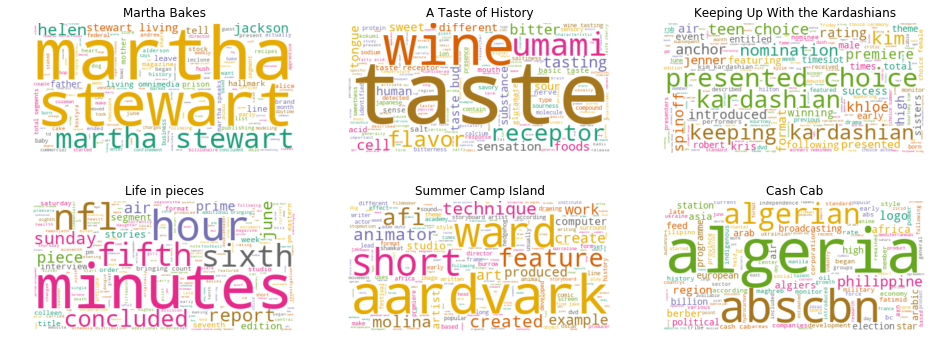

In [46]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = data.columns

# Create subplots for each comedian
for index, comedian in enumerate(data.columns[0:6]):
    wc.generate(data_clean.Data[comedian])
    
    plt.subplot(2, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [74]:
from gensim import matutils, models
import scipy.sparse

# corpus_csc = gensim.matutils.corpus2csc(corpus, num_terms=len(fnames_argsort))
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(data)
corpus = matutils.Sparse2Corpus(sparse_counts,documents_columns=False)

In [70]:
data_clean.head()

,Data
Martha Bakes,martha helen stewart née kostyra polish pronunciation born august is an american retail busin...
A Taste of History,taste gustatory perception or gustation adjectival form gustatory is one of the five traditional...
Keeping Up With the Kardashians,keeping up with the kardashians often abbreviated kuwtk is an american reality television series...
Life in pieces,life in pieces is an american sitcom television series created by justin adler and which premier...
Summer Camp Island,its been confirmed that cosmic bupkiss onwards is season by cartoon network and julia pottsumme...


In [75]:
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Data)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index


# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
#cv = data
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

/Users/krishna/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


In [76]:
len(id2word)

140378

In [78]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.016*"aardklop" + 0.016*"abbé" + 0.015*"abernathy" + 0.014*"aastrom" + 0.014*"aberrant" + 0.013*"abandons" + 0.013*"aang" + 0.011*"aaahh" + 0.011*"abbys" + 0.011*"aaldefs"'),
 (1,
  '0.031*"aarc" + 0.030*"aaarrrgghhemile" + 0.030*"aback" + 0.027*"abcboston" + 0.023*"abbey" + 0.023*"aata" + 0.020*"aatu" + 0.020*"aai" + 0.017*"aaker" + 0.017*"aberdeenripken"')]

In [79]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.037*"aata" + 0.036*"aaplus" + 0.029*"abednego" + 0.027*"aana" + 0.024*"abbé" + 0.022*"aberdeenripken" + 0.022*"abandons" + 0.022*"abajo" + 0.022*"aaturirish" + 0.020*"aacs"'),
 (1,
  '0.020*"aastrom" + 0.019*"aberrant" + 0.016*"aaahh" + 0.016*"abbys" + 0.015*"aaldefs" + 0.015*"abctvteletext" + 0.014*"aasif" + 0.014*"abdellatif" + 0.014*"abdurrahim" + 0.014*"abernathy"'),
 (2,
  '0.044*"aarc" + 0.042*"aback" + 0.038*"abcboston" + 0.037*"aaarrrgghhemile" + 0.029*"aatu" + 0.026*"aai" + 0.024*"aaker" + 0.023*"aaata" + 0.023*"abceducational" + 0.022*"abbey"')]

In [95]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=20)
lda.print_topics()

[(0,
  '0.047*"aarc" + 0.045*"aback" + 0.041*"abcboston" + 0.040*"aaarrrgghhemile" + 0.030*"aatu" + 0.028*"aai" + 0.026*"aaker" + 0.025*"aaata" + 0.024*"abceducational" + 0.024*"abbey"'),
 (1,
  '0.022*"aastrom" + 0.021*"aberrant" + 0.018*"aaahh" + 0.018*"abbys" + 0.017*"aaldefs" + 0.016*"aasif" + 0.016*"abdurrahim" + 0.016*"abdellatif" + 0.015*"abatayo" + 0.015*"aberdeen"'),
 (2,
  '0.057*"abchao" + 0.053*"abee" + 0.053*"abang" + 0.043*"aardmans" + 0.041*"abducted" + 0.029*"abcerin" + 0.029*"abbadie" + 0.027*"aaves" + 0.026*"abbie" + 0.023*"abccom"'),
 (3,
  '0.034*"aata" + 0.033*"aaplus" + 0.027*"abednego" + 0.025*"aana" + 0.023*"abbé" + 0.022*"abandons" + 0.021*"aberdeenripken" + 0.020*"abajo" + 0.020*"aaturirish" + 0.019*"aacs"')]

In [81]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [82]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.Data.apply(nouns))
data_nouns

,Data
Martha Bakes,martha née kostyra pronunciation august businesswoman writer television personality model founde...
A Taste of History,taste perception gustation form gustatory senses gustatory systemtaste sensation substance mouth...
Keeping Up With the Kardashians,kardashians kuwtk reality television series e cable network show lives kardashian–jenner family ...
Life in pieces,life pieces sitcom television series justin adler cbs series years entertainment association cen...
Summer Camp Island,bupkiss onwards season cartoon network julia pottsummer camp island television series cartoon ne...
Cash Cab,cash cab game show itv kingdom june programme worldwide cash cab franchise john moody questions ...
MacGyver,mac macgyver title character protagonist tv series macgyver dean anderson series lucas till vers...
The Incredible Dr. Pol,dr pol reality television show geo show jan pol family employees practice weidman series seasons...
Restored,camps album track release tracks jeremy camp edition tracks jeremy camp deluxe gold edition trac...
Hack My Life,hack life howto series trutv january part networks revampthe cable network site tumblr phone ser...


In [83]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.Data)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

/Users/krishna/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


,aa,aaa,aaahh,aaan,aaarrrgghhemile,aaata,aac,aactas,aacus,aae,...,피구,하늘,학사,한류,할아버지,호기,호기심많은조지,힘차게,ｗｏｏ,𐌰𐌻𐌰𐍂𐌴𐌹𐌺𐍃
Martha Bakes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Taste of History,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Keeping Up With the Kardashians,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Life in pieces,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Summer Camp Island,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cash Cab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MacGyver,0,0,0,0,0,0,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0
The Incredible Dr. Pol,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Restored,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hack My Life,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()),documents_columns=False)

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [85]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.018*"aarti" + 0.014*"aardvarkotis" + 0.013*"abc" + 0.013*"abdelhamid" + 0.012*"abruption" + 0.011*"abatayo" + 0.011*"abanindranath" + 0.011*"aaf" + 0.011*"abby" + 0.011*"abs"'),
 (1,
  '0.039*"aasif" + 0.037*"abbot" + 0.036*"aac" + 0.035*"abducteescharles" + 0.025*"abcnewscom" + 0.023*"abattoirs" + 0.023*"aan" + 0.023*"aanpujanani" + 0.020*"abandonment" + 0.019*"abella"')]

In [86]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.019*"abanindranath" + 0.019*"abs" + 0.016*"abscbnnewscom" + 0.015*"aaarrrgghhemile" + 0.015*"aapátohsipikani" + 0.015*"abdelaziz" + 0.014*"aboardaction" + 0.014*"abcbrothers" + 0.014*"abortions" + 0.014*"aardmans"'),
 (1,
  '0.047*"aasif" + 0.044*"abbot" + 0.041*"abducteescharles" + 0.038*"aac" + 0.028*"abattoirs" + 0.027*"aan" + 0.026*"aanpujanani" + 0.024*"abandonment" + 0.023*"aactas" + 0.022*"abella"'),
 (2,
  '0.037*"abatayo" + 0.032*"aarti" + 0.027*"aardvarkotis" + 0.027*"abq" + 0.026*"abcnewscom" + 0.023*"abron" + 0.023*"abdelhamid" + 0.023*"abba" + 0.021*"abc" + 0.020*"abbreviations"')]

In [87]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.084*"abandonment" + 0.081*"aat" + 0.073*"abrotanum" + 0.052*"abonnés" + 0.045*"aarti" + 0.038*"abebe" + 0.036*"abduh" + 0.035*"aboveground" + 0.034*"abcbrothers" + 0.033*"aaa"'),
 (1,
  '0.022*"abs" + 0.020*"abinadi" + 0.019*"abby" + 0.018*"aaarrrgghhemile" + 0.018*"aapátohsipikani" + 0.017*"abortions" + 0.016*"aboardaction" + 0.016*"aboutout" + 0.016*"absence" + 0.015*"abcd"'),
 (2,
  '0.034*"abatayo" + 0.026*"aardvarkotis" + 0.026*"abq" + 0.021*"abdelhamid" + 0.021*"abc" + 0.020*"abron" + 0.020*"abba" + 0.019*"aaf" + 0.019*"abbreviations" + 0.019*"abilitieskatie"'),
 (3,
  '0.055*"aasif" + 0.053*"abbot" + 0.050*"abducteescharles" + 0.048*"aac" + 0.033*"abattoirs" + 0.032*"aan" + 0.032*"aanpujanani" + 0.029*"abcnewscom" + 0.027*"aactas" + 0.026*"abbasi"')]

In [88]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [89]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.Data.apply(nouns_adj))
data_nouns_adj

,Data
Martha Bakes,martha stewart née kostyra polish pronunciation august american retail businesswoman writer tele...
A Taste of History,taste gustatory perception gustation adjectival form gustatory traditional senses gustatory syst...
Keeping Up With the Kardashians,kardashians kuwtk american reality television series e cable network show personal professional ...
Life in pieces,life pieces american sitcom television series justin adler cbs series years kapital entertainmen...
Summer Camp Island,cosmic bupkiss onwards season cartoon network julia pottsummer camp island american animated tel...
Cash Cab,cash cab game show itv united kingdom june original programme worldwide cash cab franchise john ...
MacGyver,angus mac macgyver title character protagonist tv series macgyver richard dean anderson original...
The Incredible Dr. Pol,incredible dr pol reality television show nat geo show dutchamerican veterinarian jan pol family...
Restored,jeremy camps fourth album november track standard release tracks jeremy camp enhanced edition tr...
Hack My Life,hack life weekly american howto series trutv january part networks latest revampthe cable networ...


In [90]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.Data)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

/Users/krishna/anaconda3/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


,aa,aaa,aaahh,aaan,aaarrrgghhemile,aaata,aac,aachen,aacs,aactas,...,피구,하늘,학사,한류,할아버지,호기,호기심많은조지,힘차게,ｗｏｏ,𐌰𐌻𐌰𐍂𐌴𐌹𐌺𐍃
Martha Bakes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Taste of History,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Keeping Up With the Kardashians,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Life in pieces,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Summer Camp Island,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cash Cab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MacGyver,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
The Incredible Dr. Pol,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Restored,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hack My Life,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()),documents_columns=False)

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [92]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.042*"aardvarks" + 0.040*"abangcom" + 0.037*"abclexi" + 0.037*"aac" + 0.027*"abaceria" + 0.024*"aaliyah" + 0.024*"aaker" + 0.024*"abcblackish" + 0.022*"abcwua" + 0.022*"aachen"'),
 (1,
  '0.019*"aardmans" + 0.017*"ababa" + 0.014*"aarghaumont" + 0.013*"abazas" + 0.013*"abcdumont" + 0.013*"aaps" + 0.013*"abilities" + 0.012*"ablative" + 0.012*"aawa" + 0.010*"ablaze"')]

In [93]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.020*"aawa" + 0.018*"ablaze" + 0.017*"abdullah" + 0.015*"aaarrrgghhemile" + 0.015*"abcdthe" + 0.014*"aan" + 0.014*"abatti" + 0.014*"aberystwyth" + 0.013*"abelincolns" + 0.013*"aap"'),
 (1,
  '0.036*"ababa" + 0.033*"aardmans" + 0.025*"abilities" + 0.025*"abkhazian" + 0.024*"aarghaumont" + 0.024*"aaps" + 0.021*"abkhaziaaugust" + 0.020*"abcdumont" + 0.019*"abadeer" + 0.018*"abatayo"'),
 (2,
  '0.051*"aardvarks" + 0.049*"abangcom" + 0.046*"abclexi" + 0.043*"aac" + 0.033*"abaceria" + 0.030*"aaker" + 0.030*"aaliyah" + 0.027*"aachen" + 0.027*"abcblackish" + 0.027*"abcwua"')]

In [94]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.054*"aardvarks" + 0.051*"abangcom" + 0.048*"abclexi" + 0.044*"aac" + 0.031*"aaliyah" + 0.030*"aaker" + 0.028*"aachen" + 0.028*"abcwua" + 0.026*"abdelhamid" + 0.025*"ab"'),
 (1,
  '0.061*"ababa" + 0.050*"abcblackish" + 0.041*"abilities" + 0.041*"abkhaziaaugust" + 0.036*"aaps" + 0.030*"abadeer" + 0.030*"abee" + 0.030*"abcdumont" + 0.029*"abcit" + 0.028*"abdul"'),
 (2,
  '0.028*"aardmans" + 0.019*"abazas" + 0.018*"ablative" + 0.018*"aawa" + 0.016*"ablaze" + 0.015*"abdullah" + 0.015*"aapátohsipikani" + 0.013*"abilitiesinvestigators" + 0.013*"abcdthe" + 0.013*"abatayo"'),
 (3,
  '0.079*"aarghaumont" + 0.069*"abaceria" + 0.036*"aaa" + 0.035*"abba" + 0.033*"abcmackenzie" + 0.030*"abbasid" + 0.027*"abdallahi" + 0.026*"abn" + 0.025*"abdelkader" + 0.025*"able"')]